# Insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
train_df = pd.read_csv("/content/train (2).csv")
test_df = pd.read_csv("/content/test (1).csv")

In [ ]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
train_df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
train_df.shape

(1200000, 21)

In [ ]:
train_df.isna().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [ ]:
train_df = train_df.drop('id', axis=1)

In [ ]:
train_df.isna().sum().sort_values(ascending=False)

,0
Previous Claims,364029
Occupation,358075
Credit Score,137882
Number of Dependents,109672
Customer Feedback,77824
Health Score,74076
Annual Income,44949
Age,18705
Marital Status,18529
Vehicle Age,6


In [ ]:
train_df_copy = train_df.copy()

In [ ]:
train_df_copy = train_df_copy.dropna()

In [ ]:
train_df_copy.shape

(384004, 20)

In [ ]:
train_df_copy.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
num_cols = ['Age', 'Annual Income', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
cat_cols_onehot = ['Gender', 'Marital Status', 'Occupation', 'Location', 'Smoking Status', 'Property Type']
cat_cols_ordinal = ['Education Level', 'Number of Dependents', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']

ordinal_categories = [['High School', 'Bachelor\'s', 'Master\'s', 'PhD'],
                                      [0.0, 1.0, 2.0, 3.0, 4.0],
                                      ['Basic', 'Comprehensive', 'Premium'],
                                      ['Poor', 'Average', 'Good'],
                                      ['Rarely', 'Monthly', 'Weekly', 'Daily']]

drop_cols = ['id', 'Policy Start Date']

In [ ]:
X = train_df_copy.drop('Premium Amount', axis=1)
y = train_df_copy['Premium Amount']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

ct = make_column_transformer(
        (OneHotEncoder(), cat_cols_onehot),
        (OrdinalEncoder(categories=ordinal_categories), cat_cols_ordinal),
        (StandardScaler(), num_cols)
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = ct.fit_transform(X_train)
X_val_transformed = ct.transform(X_val)

In [ ]:
X_train_transformed.shape

(307203, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train_transformed.shape[1:]),
    tf.keras.layers.Dense(units=128, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(units=64, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(units=32, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(units=16, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(units=1),
    tf.keras.layers.ReLU()
])

In [ ]:
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['RootMeanSquaredError'])

In [ ]:
mcb = tf.keras.callbacks.ModelCheckpoint(
    filepath='my_model_for_insurance.keras',
    monitor='val_loss',
    save_best_only=True
)

escb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)

rlrop = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.5,
    patience=5
)

In [ ]:
model.fit(X_train_transformed, y_train, epochs=20, validation_data=(X_val_transformed, y_val), callbacks=[mcb, escb, rlrop])

Epoch 1/20
9601/9601 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - RootMeanSquaredError: 984.1598 - loss: 699.5113 - val_RootMeanSquaredError: 896.7852 - val_loss: 629.2333 - learning_rate: 0.0100
Epoch 2/20
9601/9601 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - RootMeanSquaredError: 895.7831 - loss: 630.0406 - val_RootMeanSquaredError: 889.5601 - val_loss: 626.9978 - learning_rate: 0.0100
Epoch 3/20
9601/9601 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - RootMeanSquaredError: 893.5111 - loss: 630.7130 - val_RootMeanSquaredError: 881.1863 - val_loss: 627.6924 - learning_rate: 0.0100
Epoch 4/20
9601/9601 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - RootMeanSquaredError: 890.2569 - loss: 628.5397 - val_RootMeanSquaredError: 883.9883 - val_loss: 626.0145 - learning_rate: 0.0100
Epoch 5/20
9601/9601 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - RootMeanSquaredError: 889.7706 - loss: 628.3316 - val_RootMeanSquaredError: 879.1515 - val_loss: 627.3661 - learning_rate: 0.0100
Epoch 6/20
9601/9601 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - RootMean

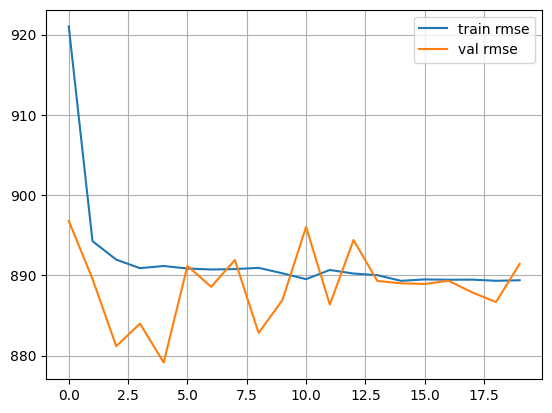

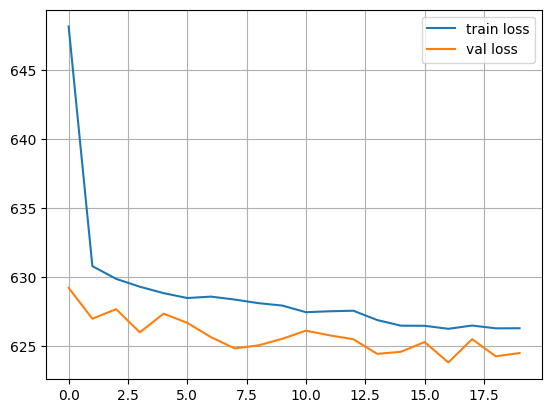

In [ ]:
plt.plot(model.history.history['RootMeanSquaredError'], label='train rmse')
plt.plot(model.history.history['val_RootMeanSquaredError'], label='val rmse')
plt.legend()
plt.grid()
plt.show()

plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.grid()
plt.show()